In [ ]:
import pandas as pd


In [ ]:
# Step 1: Load the CSV files for Spotify and DJIA
spotify_file = '/content/drive/MyDrive/dataset/Spotify_Closing_Price.csv' # Replace with the path to your Spotify CSV file
djia_file = '/content/drive/MyDrive/dataset/DJIA_Closing_Price.csv' # Replace with the path to your DJIA CSV file

In [ ]:
# Loading Spotify and DJIA data from CSVs
spotify_data = pd.read_csv(spotify_file, parse_dates=['Date'])
djia_data = pd.read_csv(djia_file, parse_dates=['Date'])


In [ ]:
# Step 2: Preprocess the data
# Ensure 'Date' is the index for both dataframes
spotify_data.set_index('Date', inplace=True)
djia_data.set_index('Date', inplace=True)


In [ ]:
# Checking the column names to make sure they're correct
print("Spotify Data:\n", spotify_data.head())
print("DJIA Data:\n", djia_data.head())

Spotify Data:
                   SPOT  Daily Return
Date                                
2019-12-16  150.779999           NaN
2019-12-17  151.529999      0.004974
2019-12-18  150.869995     -0.004356
2019-12-19  149.679993     -0.007888
2019-12-20  150.309998      0.004209
DJIA Data:
                     ^DJI
Date                    
2019-12-16  28235.890625
2019-12-17  28267.160156
2019-12-18  28239.279297
2019-12-19  28376.960938
2019-12-20  28455.089844


Calculating the daily returns for Spotify & plotting a histogram of the daily returns

In [ ]:
# Calculating the daily returns for Spotify
spotify_data['Daily Return'] = spotify_data['SPOT'].pct_change()

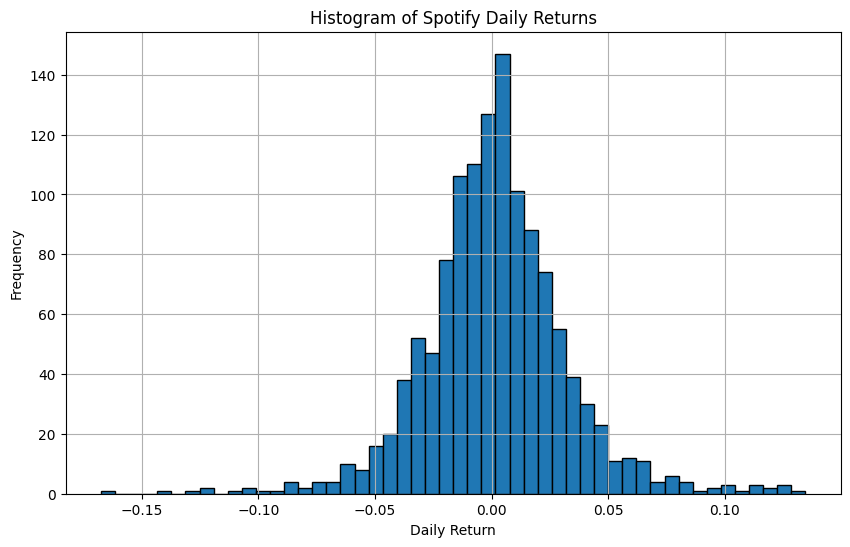

In [ ]:
# Plotting a histogram of Spotify's daily returns
plt.figure(figsize=(10,6))
plt.hist(spotify_data['Daily Return'].dropna(), bins=50, edgecolor='black')
plt.title("Histogram of Spotify Daily Returns")
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Calculating the skewness and kurtosis of the daily returns.

In [ ]:
# Calulating skewness and kurtosis for Spotify's daily returns
skewness = skew(spotify_data['Daily Return'].dropna())
kurt = kurtosis(spotify_data['Daily Return'].dropna())

In [ ]:
print(f"Skewness of Spotify Daily Returns: {skewness:.4f}")
print(f"Kurtosis of Spotify Daily Returns: {kurt:.4f}")

Skewness of Spotify Daily Returns: 0.0570
Kurtosis of Spotify Daily Returns: 3.2178


 Determining using a statistical test if the daily returns following a normal distribution (with 95% confidence)

In [ ]:
# Testing for normal distribution (Shapiro-Wilk Test)
stat, p_value = shapiro(spotify_data['Daily Return'].dropna())
print(f"Shapiro-Wilk Test p-value: {p_value:.4f}")

Shapiro-Wilk Test p-value: 0.0000


In [ ]:
if p_value > 0.05:
    print("Spotify's daily returns are normally distributed.")
else:
    print("Spotify's daily returns are not normally distributed.")

Spotify's daily returns are not normally distributed.


Identifyting Outliers

In [ ]:
# Identify outliers (dates with returns beyond ±3 standard deviations)
mean_return = spotify_data['Daily Return'].mean()
std_return = spotify_data['Daily Return'].std()

In [ ]:
print("Mean of Daily Returns:", mean_return)
print("Standard Deviation of Daily Returns:", std_return)

Mean of Daily Returns: 0.0014164792815354436
Standard Deviation of Daily Returns: 0.03129363481675846


Identifying those dates and returns that were smaller than -3 standard deviations or larger than +3 standard deviations.

In [ ]:
# Identify dates where returns are >3 std or < -3 std
outliers = spotify_data[(spotify_data['Daily Return'] > mean_return + 3*std_return) |
                        (spotify_data['Daily Return'] < mean_return - 3*std_return)]

In [ ]:
print("\nOutliers (dates with returns beyond ±3 standard deviations):")
print(outliers[['SPOT', 'Daily Return']])


Outliers (dates with returns beyond ±3 standard deviations):
                  SPOT  Daily Return
Date                                
2020-03-16  117.639999     -0.105807
2020-03-24  129.690002      0.097394
2020-04-29  155.779999      0.114466
2020-06-18  225.279999      0.127358
2020-06-25  267.470001      0.101334
2020-07-20  291.190002      0.106219
2020-10-30  239.889999     -0.101098
2020-12-02  320.890015      0.125969
2021-02-25  303.059998     -0.094505
2021-04-28  256.839996     -0.123174
2022-01-31  196.259995      0.134582
2022-02-03  159.759995     -0.167570
2022-04-20  122.489998     -0.108580
2022-04-27   96.669998     -0.124445
2022-05-09   94.440002     -0.097822
2022-07-27  116.610001      0.121574
2022-10-26   84.419998     -0.130139
2022-11-10   78.440002      0.098599
2023-01-31  112.720001      0.127200
2023-07-25  140.380005     -0.142560
2023-10-24  170.630005      0.103616
2024-04-23  303.309998      0.114127
2024-07-23  330.790009      0.119614
2024-11-13  4

In [ ]:
# Calculating the daily returns for DJIA
# Use '^DJI' column for DJIA
djia_data['Daily Return'] = djia_data['^DJI'].pct_change()

In [ ]:
# Performing a  linear regression between Spotify and DJIA daily returns
# Merging Spotify and DJIA data on the date index
merged_data = pd.merge(spotify_data[['Daily Return']], djia_data[['Daily Return']],
                       left_index=True, right_index=True, suffixes=('_spotify', '_djia'))

In [ ]:
# Removing rows with missing data (NaN values)
merged_data = merged_data.dropna()

In [ ]:
print("Merged Data:\n", merged_data.head())

Merged Data:
             Daily Return_spotify  Daily Return_djia
Date                                               
2019-12-17              0.004974           0.001107
2019-12-18             -0.004356          -0.000986
2019-12-19             -0.007888           0.004876
2019-12-20              0.004209           0.002753
2019-12-23              0.000732           0.003389


Downloading the Dow Jones Industrial Average (DJIA) daily adjusted closing price for the same 5 years of history. Calculating its daily returns. Performing a linear regression between DJIA returns (independent variable) and the stock’s returns (dependent variable). Report Beta, Alpha, R-square, pvalue.

In [ ]:
# Performing Linear Regression
X = merged_data['Daily Return_djia']
y = merged_data['Daily Return_spotify']
X = sm.add_constant(X)  # Add a constant for the intercept

model = sm.OLS(y, X).fit()

In [ ]:
# Print the results of the regression
print("\nLinear Regression Results:")
print(model.summary())


Linear Regression Results:
                             OLS Regression Results                             
Dep. Variable:     Daily Return_spotify   R-squared:                       0.120
Model:                              OLS   Adj. R-squared:                  0.119
Method:                   Least Squares   F-statistic:                     171.0
Date:                  Sat, 14 Dec 2024   Prob (F-statistic):           9.80e-37
Time:                          03:56:35   Log-Likelihood:                 2651.9
No. Observations:                  1257   AIC:                            -5300.
Df Residuals:                      1255   BIC:                            -5289.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

In [ ]:
# Extract key values:
alpha = model.params[0]
beta = model.params[1]
r_squared = model.rsquared
p_value = model.pvalues[1]

<ipython-input-30-d37dcbbef660>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
<ipython-input-30-d37dcbbef660>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
<ipython-input-30-d37dcbbef660>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = model.pvalues[1]


In [ ]:
print(f"\nAlpha: {alpha:.4f}")
print(f"Beta: {beta:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"P-value: {p_value:.4f}")


Alpha: 0.0011
Beta: 0.8296
R-squared: 0.1199
P-value: 0.0000
